## IMPORT NECESSARY PACKAGES

In [26]:
import os
import json
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from circum import xy_values
import random
from pathlib import Path
import ast

## FUJI

In [27]:
set_ = "test"

In [28]:
#json into csv so that we can merge all sets

train = "/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/Masters by Research\
/Mask RCNN/Annotation projects/FUJI/{}_images".format(set_)
os.chdir(train)

In [29]:
with open("via_project_fuji.json","r") as file:
    data = file.read()

In [30]:
data = json.loads(data)

In [31]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']
meta_fuji = pd.DataFrame(columns=headers)
meta_fuji

Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

In [32]:
i = 1
one = list((list(data.values())[1]).values())[i]
a = one["filename"] #filename
print(a)
b = one["size"] #file_size
c = "{}" #file_attributes
d = len(one["regions"])#region_count
g = "{}" #region_attributes
img = cv.imread(a)
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_fuji = pd.concat([meta_fuji,one_df],ignore_index=True)
meta_fuji

_MG_3004_06.jpg


filename file_size file_attributes region_count region_id  \
0  _MG_3004_06.jpg    199852              {}            2         0   
1  _MG_3004_06.jpg    199852              {}            2         1   

                             region_shape_attributes region_attributes  
0  {'name': 'polygon', 'all_points_x': [274, 273,...                {}  
1  {'name': 'polygon', 'all_points_x': [855, 854,...                {}

# LOOP THROUGH ALL IMAGES

In [33]:
n = len(list((list(data.values())[1]).values()))
print(n)
meta_fuji = pd.DataFrame(columns=headers)
meta_fuji

57


Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

In [34]:
for i in range(n):
    one = list((list(data.values())[1]).values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(a)
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        row = [a,b,c,d,e,f,g]
        one_df.loc[j] = row
    meta_fuji = pd.concat([meta_fuji,one_df],ignore_index=True)

In [35]:
meta_fuji.shape

(551, 7)

# Test`

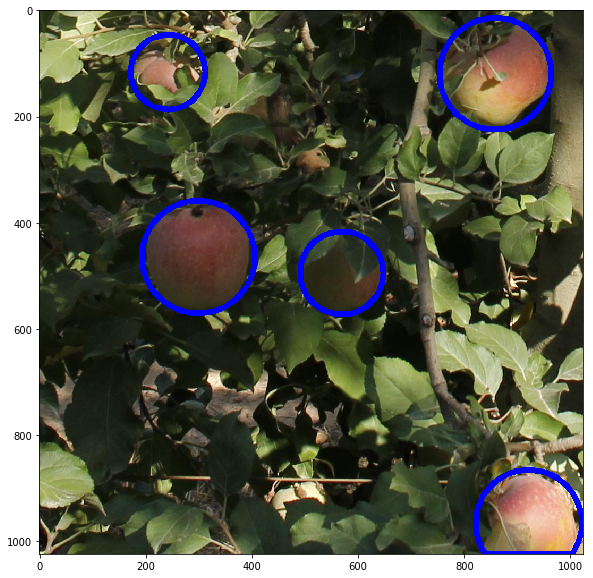

In [36]:
file = random.choice(list(meta_fuji["filename"].unique()))
example = (meta_fuji.loc[meta_fuji["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except KeyError as s:
    print("No instance to display")

In [37]:
#OK OK OK OK OK

## ACFR APPLES - LOOP ALL THROUGH IMAGES

In [38]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/Masters by Research/\
Mask RCNN/Annotation projects/ACFR/apples")
#check below code to change from train and test set and vice versa

metadf = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = os.path.join(os.getcwd(),"{}_csv".format(set_))
apples_images = os.path.join(os.getcwd(),"{}_images".format(set_))
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf = pd.concat([metadf, df], ignore_index=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [39]:
metadf=metadf.drop(['#item', 'c-x','c-y','radius','label'], axis = 1) 
#rearrange columns
metadf = metadf[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]
metadf.shape

(1088, 7)

# TEST'

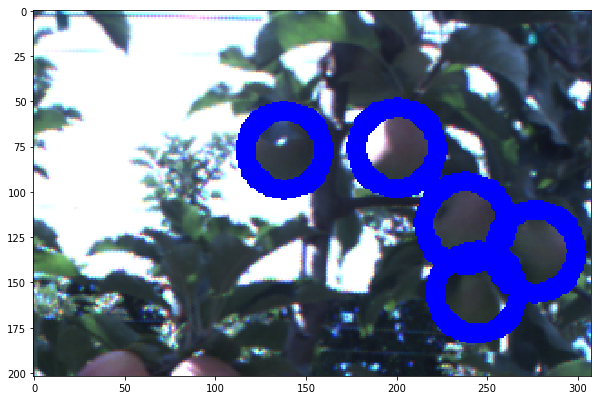

In [40]:
file = random.choice(list(metadf["filename"].unique()))
example = (metadf.loc[metadf["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(os.path.join(os.getcwd(),"{}_images".format(set_),example.loc[1]["filename"]))
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

## ACFR MANGOES

In [41]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/\
Masters by Research/Mask RCNN/Annotation projects/ACFR/mangoes")

In [42]:
def center_radius(x,y,dx,dy):
    cx = x+(0.5*dx)
    cy = y+(0.5*dy)
    radius = 0.5*(max(dx,dy))
    return cx,cy, radius

In [43]:
images_path = os.path.join(os.getcwd(),"{}_images".format(set_))
annotations_path = os.path.join(os.getcwd(),"{}_csv".format(set_))

## ONE

In [44]:
annotations_list = os.listdir(annotations_path)
a = annotations_list[0]
a
df_a = pd.read_csv(os.path.join(annotations_path,a))
df_a
image_name =  a.replace(".csv",".png")
img = cv.imread(os.path.join(images_path,image_name))
for row in range(len(df_a)):
    cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
             df_a.at[row,"dx"],df_a.at[row,"dy"])
    df_a.at[row,"cx"] = cx
    df_a.at[row,"cy"] = cy
    df_a.at[row,"radius"] = radius_
    df_a.at[row,"filename"] = image_name
    df_a.at[row,"file_attributes"] = "{}"
    df_a.at[row,"region_count"] = len(df_a)
    df_a.at[row,'region_id'] = row
    df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
    t = {"name":"polygon","all_points_x":None,"all_points_y":None}
    x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df_a.at[row,'region_shape_attributes'] = str(t)
    df_a.at[row,"region_attributes"] = "{}"

In [45]:
df_a["file_size"] = df_a["file_size"].astype("int64")
df_a["region_count"] = df_a["region_count"].astype("int64")
df_a['region_id'] = df_a['region_id'].astype("int64")
df_a

#item           x           y         dx         dy  label          cx  \
0       0   72.631579  155.789474  30.717490  29.640806      1   87.990324   
1       1  154.210526  174.736842  27.645741  26.676725      1  168.033397   
2       2  275.789474   87.368421  27.645741  32.278838      1  289.612344   
3       3  440.000000   17.894737  24.881167  29.050954      1  452.440584   
4       4  458.947368   16.842105  24.881167  29.050954      1  471.387952   
5       5  398.947368  264.210526  30.106212  35.151654      1  414.000474   
6       6  423.684211  245.263158  24.142171  28.188112      1  435.755296   
7       7  318.947368  405.789474  23.900750  30.696854      1  330.897743   
8       8  135.789474  371.052632  26.290825  30.696854      1  148.934886   
9       9  103.684211  227.368421  21.295568  24.864451      1  114.331995   
10     10   73.157895  118.947368  23.425125  27.350897      1   84.870457   

            cy     radius                               filename  \
0   170.609877  15.358745  20151124T025049.132800_i1923j1012.png   
1   188.075205  13.822871  20151124T025049.132800_i1923j1012.png   
2   103.507840  16.139419  20151124T025049.132800_i1923j1012.png   
3    32.420214  14.525477  20151124T025049.132800_i1923j1012.png   
4    31.367582  14.525477  20151124T025049.132800_i1923j1012.png   
5   281.786354  17.575827  20151124T025049.132800_i1923j1012.png   
6   259.357214  14.094056  20151124T025049.132800_i1923j1012.png   
7   421.137900  15.348427  20151124T025049.132800_i1923j1012.png   
8   386.401058  15.348427  20151124T025049.132800_i1923j1012.png   
9   239.800647  12.432226  20151124T025049.132800_i1923j1012.png   
10  132.622817  13.675448  20151124T025049.132800_i1923j1012.png   

   file_attributes  region_count  region_id  file_size  \
0               {}            11          0    1056928   
1               {}            11          1    1056928   
2               {}            11          2    1056928   
3               {}            11          3    1056928   
4               {}            11          4    1056928   
5               {}            11          5    1056928   
6               {}            11          6    1056928   
7               {}            11          7    1056928   
8               {}            11          8    1056928   
9               {}            11          9    1056928   
10              {}            11         10    1056928   

                              region_shape_attributes region_attributes  
0   {'name': 'polygon', 'all_points_x': [103, 103,...                {}  
1   {'name': 'polygon', 'all_points_x': [181, 181,...                {}  
2   {'name': 'polygon', 'all_points_x': [305, 305,...                {}  
3   {'name': 'polygon', 'all_points_x': [466, 466,...                {}  
4   {'name': 'polygon', 'all_points_x': [485, 485,...                {}  
5   {'name': 'polygon', 'all_points_x': [431, 431,...                {}  
6   {'name': 'polygon', 'all_points_x': [449, 449,...                {}  
7   {'name': 'polygon', 'all_points_x': [346, 346,...                {}  
8   {'name': 'polygon', 'all_points_x': [164, 164,...                {}  
9   {'name': 'polygon', 'all_points_x': [126, 126,...                {}  
10  {'name': 'polygon', 'all_points_x': [98, 98, 9...                {}

## LOOP THROUGH ALL 

In [46]:
annotations_list = os.listdir(annotations_path)
metadf_ = pd.DataFrame(columns=['#item',
 'x',
 'y',
 'dx',
 'dy',
 'label',
 'cx',
 'cy',
 'radius',
 'filename',
 'file_attributes',
 'region_count',
 'region_id',
 'file_size',
 'region_shape_attributes',
 'region_attributes'])
for index,annotation in enumerate(annotations_list):
    df_a = pd.read_csv(os.path.join(annotations_path,annotation))
    df_a
    image_name =  annotation.replace(".csv",".png")
    img = cv.imread(os.path.join(images_path,image_name))
    for row in range(len(df_a)):
        cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
                 df_a.at[row,"dx"],df_a.at[row,"dy"])
        df_a.at[row,"cx"] = cx
        df_a.at[row,"cy"] = cy
        df_a.at[row,"radius"] = radius_
        df_a.at[row,"filename"] = image_name
        df_a.at[row,"file_attributes"] = "{}"
        df_a.at[row,"region_count"] = len(df_a)
        df_a.at[row,'region_id'] = row
        df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df_a.at[row,'region_shape_attributes'] = str(t)
        df_a.at[row,"region_attributes"] = "{}"
    metadf_ = pd.concat([metadf_, df_a], ignore_index=True)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [47]:
metadf_["file_size"] = metadf_["file_size"].astype("int64")
metadf_["region_count"] = metadf_["region_count"].astype("int64")
metadf_['region_id'] = metadf_['region_id'].astype("int64")
metadf_.head()

#item          cx          cy         dx         dy file_attributes  \
0     0   87.990324  170.609877  30.717490  29.640806              {}   
1     1  168.033397  188.075205  27.645741  26.676725              {}   
2     2  289.612344  103.507840  27.645741  32.278838              {}   
3     3  452.440584   32.420214  24.881167  29.050954              {}   
4     4  471.387952   31.367582  24.881167  29.050954              {}   

   file_size                               filename label     radius  \
0    1056928  20151124T025049.132800_i1923j1012.png     1  15.358745   
1    1056928  20151124T025049.132800_i1923j1012.png     1  13.822871   
2    1056928  20151124T025049.132800_i1923j1012.png     1  16.139419   
3    1056928  20151124T025049.132800_i1923j1012.png     1  14.525477   
4    1056928  20151124T025049.132800_i1923j1012.png     1  14.525477   

  region_attributes  region_count  region_id  \
0                {}            11          0   
1                {}            11          1   
2                {}            11          2   
3                {}            11          3   
4                {}            11          4   

                             region_shape_attributes           x           y  
0  {'name': 'polygon', 'all_points_x': [103, 103,...   72.631579  155.789474  
1  {'name': 'polygon', 'all_points_x': [181, 181,...  154.210526  174.736842  
2  {'name': 'polygon', 'all_points_x': [305, 305,...  275.789474   87.368421  
3  {'name': 'polygon', 'all_points_x': [466, 466,...  440.000000   17.894737  
4  {'name': 'polygon', 'all_points_x': [485, 485,...  458.947368   16.842105

In [48]:
metadf_mangoes=metadf_.drop(['#item', 'cx','cy','radius','label','x','y'], axis = 1) 
metadf_mangoes = metadf_mangoes[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]
metadf_mangoes.shape

(1830, 7)

## TEST

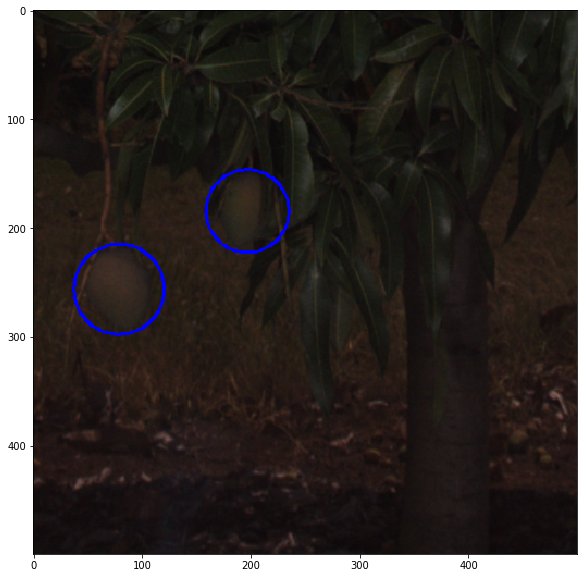

In [51]:
file = random.choice(list(metadf_mangoes["filename"].unique()))
example = (metadf_mangoes.loc[metadf_mangoes["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(os.path.join(os.getcwd(),"{}_images".format(set_),example.loc[1]["filename"]))
try:
    for i in range(len(example)):
        a = ast.literal_eval(example.loc[i]["region_shape_attributes"])
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=2)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

## MERGE

In [52]:
#when merging test set remember not to include meta_rr because it doesnt have the test folder
to_path = "/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/\
Masters by Research/Mask RCNN/Annotation projects/fruits/csv"
if set_ == "train":
    merged = pd.concat([meta_fuji,metadf,metadf_mangoes],ignore_index=True)
    print("Train Set:",len(merged))
    merged.to_csv(os.path.join(to_path,"train.csv"),index=False)
else:
    merged = pd.concat([meta_fuji,metadf,metadf_mangoes],ignore_index=True)
    print("Test Set:",len(merged))
    merged.to_csv(os.path.join(to_path,"test.csv"),index=False)

Test Set: 3469


# ROUGH SPACE

In [53]:
# remove images that will not be used in training and testing after disregading Robotics, RR, and RRR

In [81]:
import json
set_ = "val"
json_file = "/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/\
Masters by Research/Mask RCNN/Annotation projects/fruits/{}/via_project_fruits.json".format(set_)

with open(json_file,"r") as fp:
    data = fp.read()
    
data = json.loads(data)
annotation = list(data.values())
print(len(annotation))
print(annotation[0]["filename"])


612
_MG_3004_06.jpg


In [82]:
folder = "/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/\
Masters by Research/Mask RCNN/Annotation projects/fruits/{}/".format(set_)
files = os.listdir(folder)

In [83]:
c = 0 
for i in range(len(annotation)):
    if annotation[i]["filename"] in files:
        pass
    else:
        c = c + 1

In [84]:
c

0

# ROBOTICS

In [16]:
#json into csv so that we can merge
train = "/home/kiprono/Documents/STELLENBOSCH UNIVERSITY/Masters by Research\
/Mask RCNN/Annotation projects/ROBOTICS/{}_images".format(set_)
os.chdir(train)

In [14]:
with open("via_project_robotics.json","r") as file:
    data = file.read()

In [15]:
data = json.loads(data)

In [16]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']
meta_robotics = pd.DataFrame(columns=headers)
meta_robotics

Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

# ONE

In [17]:
i = 1
one = list((list(data.values())[1]).values())[i]
a = one["filename"] #filename
print(a)
b = one["size"] #file_size
print(b)
c = "{}" #file_attributes
d = len(one["regions"])#region_count
print(d)
g = "{}" #region_attributes
img = cv.imread(a)
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_robotics = pd.concat([meta_robotics,one_df],ignore_index=True)
meta_robotics

0001-1-131-0131.jpg
1834377
17


filename file_size file_attributes region_count region_id  \
0   0001-1-131-0131.jpg   1834377              {}           17         0   
1   0001-1-131-0131.jpg   1834377              {}           17         1   
2   0001-1-131-0131.jpg   1834377              {}           17         2   
3   0001-1-131-0131.jpg   1834377              {}           17         3   
4   0001-1-131-0131.jpg   1834377              {}           17         4   
5   0001-1-131-0131.jpg   1834377              {}           17         5   
6   0001-1-131-0131.jpg   1834377              {}           17         6   
7   0001-1-131-0131.jpg   1834377              {}           17         7   
8   0001-1-131-0131.jpg   1834377              {}           17         8   
9   0001-1-131-0131.jpg   1834377              {}           17         9   
10  0001-1-131-0131.jpg   1834377              {}           17        10   
11  0001-1-131-0131.jpg   1834377              {}           17        11   
12  0001-1-131-0131.jpg   1834377              {}           17        12   
13  0001-1-131-0131.jpg   1834377              {}           17        13   
14  0001-1-131-0131.jpg   1834377              {}           17        14   
15  0001-1-131-0131.jpg   1834377              {}           17        15   
16  0001-1-131-0131.jpg   1834377              {}           17        16   

                              region_shape_attributes region_attributes  
0   {'name': 'polygon', 'all_points_x': [1720, 171...                {}  
1   {'name': 'polygon', 'all_points_x': [1823, 182...                {}  
2   {'name': 'polygon', 'all_points_x': [1677, 167...                {}  
3   {'name': 'polygon', 'all_points_x': [1680, 167...                {}  
4   {'name': 'polygon', 'all_points_x': [1718, 171...                {}  
5   {'name': 'polygon', 'all_points_x': [1607, 160...                {}  
6   {'name': 'polygon', 'all_points_x': [1496, 149...                {}  
7   {'name': 'polygon', 'all_points_x': [1467, 146...                {}  
8   {'name': 'polygon', 'all_points_x': [1578, 157...                {}  
9   {'name': 'polygon', 'all_points_x': [1596, 159...                {}  
10  {'name': 'polygon', 'all_points_x': [1542, 154...                {}  
11  {'name': 'polygon', 'all_points_x': [1361, 136...                {}  
12  {'name': 'polygon', 'all_points_x': [1313, 131...                {}  
13  {'name': 'polygon', 'all_points_x': [1363, 136...                {}  
14  {'name': 'polygon', 'all_points_x': [1482, 148...                {}  
15  {'name': 'polygon', 'all_points_x': [1321, 132...                {}  
16  {'name': 'polygon', 'all_points_x': [1372, 137...                {}

# LOOP THROUGH ALL IMAGES ROBOTICS

In [18]:
n = len(list((list(data.values())[1]).values()))
print(n)
meta_robotics = pd.DataFrame(columns=headers)
meta_robotics

39


Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

In [19]:
for i in range(n):
    one = list((list(data.values())[1]).values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(a)
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        row = [a,b,c,d,e,f,g]
        one_df.loc[j] = row
    meta_robotics = pd.concat([meta_robotics,one_df],ignore_index=True)

In [20]:
meta_robotics

filename file_size file_attributes region_count region_id  \
0        0001-1-92-0092.jpg   1821929              {}           14         0   
1        0001-1-92-0092.jpg   1821929              {}           14         1   
2        0001-1-92-0092.jpg   1821929              {}           14         2   
3        0001-1-92-0092.jpg   1821929              {}           14         3   
4        0001-1-92-0092.jpg   1821929              {}           14         4   
5        0001-1-92-0092.jpg   1821929              {}           14         5   
6        0001-1-92-0092.jpg   1821929              {}           14         6   
7        0001-1-92-0092.jpg   1821929              {}           14         7   
8        0001-1-92-0092.jpg   1821929              {}           14         8   
9        0001-1-92-0092.jpg   1821929              {}           14         9   
10       0001-1-92-0092.jpg   1821929              {}           14        10   
11       0001-1-92-0092.jpg   1821929              {}           14        11   
12       0001-1-92-0092.jpg   1821929              {}           14        12   
13       0001-1-92-0092.jpg   1821929              {}           14        13   
14      0001-1-131-0131.jpg   1834377              {}           17         0   
15      0001-1-131-0131.jpg   1834377              {}           17         1   
16      0001-1-131-0131.jpg   1834377              {}           17         2   
17      0001-1-131-0131.jpg   1834377              {}           17         3   
18      0001-1-131-0131.jpg   1834377              {}           17         4   
19      0001-1-131-0131.jpg   1834377              {}           17         5   
20      0001-1-131-0131.jpg   1834377              {}           17         6   
21      0001-1-131-0131.jpg   1834377              {}           17         7   
22      0001-1-131-0131.jpg   1834377              {}           17         8   
23      0001-1-131-0131.jpg   1834377              {}           17         9   
24      0001-1-131-0131.jpg   1834377              {}           17        10   
25      0001-1-131-0131.jpg   1834377              {}           17        11   
26      0001-1-131-0131.jpg   1834377              {}           17        12   
27      0001-1-131-0131.jpg   1834377              {}           17        13   
28      0001-1-131-0131.jpg   1834377              {}           17        14   
29      0001-1-131-0131.jpg   1834377              {}           17        15   
..                      ...       ...             ...          ...       ...   
477  0005-11647-156-201.jpg    660283              {}           45        18   
478  0005-11647-156-201.jpg    660283              {}           45        19   
479  0005-11647-156-201.jpg    660283              {}           45        20   
480  0005-11647-156-201.jpg    660283              {}           45        21   
481  0005-11647-156-201.jpg    660283              {}           45        22   
482  0005-11647-156-201.jpg    660283              {}           45        23   
483  0005-11647-156-201.jpg    660283              {}           45        24   
484  0005-11647-156-201.jpg    660283              {}           45        25   
485  0005-11647-156-201.jpg    660283              {}           45        26   
486  0005-11647-156-201.jpg    660283              {}           45        27   
487  0005-11647-156-201.jpg    660283              {}           45        28   
488  0005-11647-156-201.jpg    660283              {}           45        29   
489  0005-11647-156-201.jpg    660283              {}           45        30   
490  0005-11647-156-201.jpg    660283              {}           45        31   
491  0005-11647-156-201.jpg    660283              {}           45        32   
492  0005-11647-156-201.jpg    660283              {}           45        33   
493  0005-11647-156-201.jpg    660283              {}           45        34   
494  0005-11647-156-201.jpg    660283              {}           45        35   
495  0005-11647-156

## TEST `

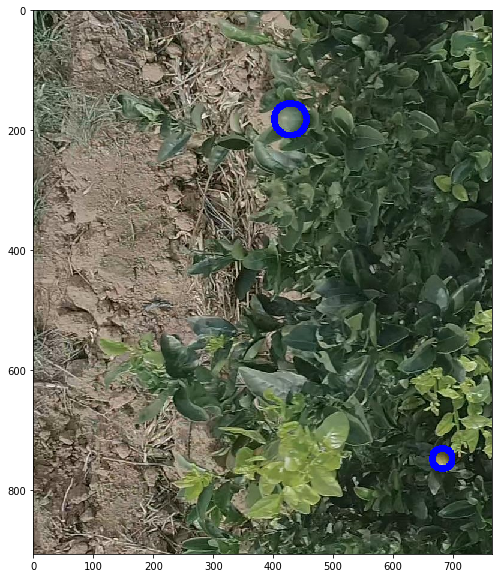

In [21]:
file = random.choice(list(meta_robotics["filename"].unique()))
example = (meta_robotics.loc[meta_robotics["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

## RR

In [22]:
#json into csv so that we can merge the sets
#no test images for RR set
train = "/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/\
Mask RCNN/Annotation projects/RR/train_images"
os.chdir(train)

In [23]:
with open("via_project_rr.json","r") as file:
    data = file.read()

In [24]:
data = json.loads(data)

In [25]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']
meta_rr = pd.DataFrame(columns=headers)
meta_rr

Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

## ONE

In [26]:
i = 6
one = list((list(data.values())[1]).values())[i]
a = one["filename"] #filename
print(a)
b = one["size"] #file_size
c = "{}" #file_attributes
d = len(one["regions"])#region_count
g = "{}" #region_attributes
img = cv.imread(a)
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_rr = pd.concat([meta_rr,one_df],ignore_index=True)
meta_rr

0001-0001-11647-166-51.jpg


filename file_size file_attributes region_count  \
0   0001-0001-11647-166-51.jpg     74541              {}           21   
1   0001-0001-11647-166-51.jpg     74541              {}           21   
2   0001-0001-11647-166-51.jpg     74541              {}           21   
3   0001-0001-11647-166-51.jpg     74541              {}           21   
4   0001-0001-11647-166-51.jpg     74541              {}           21   
5   0001-0001-11647-166-51.jpg     74541              {}           21   
6   0001-0001-11647-166-51.jpg     74541              {}           21   
7   0001-0001-11647-166-51.jpg     74541              {}           21   
8   0001-0001-11647-166-51.jpg     74541              {}           21   
9   0001-0001-11647-166-51.jpg     74541              {}           21   
10  0001-0001-11647-166-51.jpg     74541              {}           21   
11  0001-0001-11647-166-51.jpg     74541              {}           21   
12  0001-0001-11647-166-51.jpg     74541              {}           21   
13  0001-0001-11647-166-51.jpg     74541              {}           21   
14  0001-0001-11647-166-51.jpg     74541              {}           21   
15  0001-0001-11647-166-51.jpg     74541              {}           21   
16  0001-0001-11647-166-51.jpg     74541              {}           21   
17  0001-0001-11647-166-51.jpg     74541              {}           21   
18  0001-0001-11647-166-51.jpg     74541              {}           21   
19  0001-0001-11647-166-51.jpg     74541              {}           21   
20  0001-0001-11647-166-51.jpg     74541              {}           21   

   region_id                            region_shape_attributes  \
0          0  {'name': 'polygon', 'all_points_x': [120, 119,...   
1          1  {'name': 'polygon', 'all_points_x': [99, 98, 9...   
2          2  {'name': 'polygon', 'all_points_x': [277, 277,...   
3          3  {'name': 'polygon', 'all_points_x': [276, 275,...   
4          4  {'name': 'polygon', 'all_points_x': [253, 252,...   
5          5  {'name': 'polygon', 'all_points_x': [231, 230,...   
6          6  {'name': 'polygon', 'all_points_x': [101, 100,...   
7          7  {'name': 'polygon', 'all_points_x': [75, 74, 7...   
8          8  {'name': 'polygon', 'all_points_x': [99, 99, 9...   
9          9  {'name': 'polygon', 'all_points_x': [122, 122,...   
10        10  {'name': 'polygon', 'all_points_x': [298, 298,...   
11        11  {'name': 'polygon', 'all_points_x': [281, 280,...   
12        12  {'name': 'polygon', 'all_points_x': [272, 271,...   
13        13  {'name': 'polygon', 'all_points_x': [28, 27, 2...   
14        14  {'name': 'polygon', 'all_points_x': [322, 321,...   
15        15  {'name': 'polygon', 'all_points_x': [363, 362,...   
16        16  {'name': 'polygon', 'all_points_x': [378, 377,...   
17        17  {'name': 'polygon', 'all_points_x': [399, 398,...   
18        18  {'name': 'polygon', 'all_points_x': [416, 415,...   
19        19  {'name': 'polygon', 'all_points_x': [454, 454,...   
20        20  {'name': 'polygon', 'all_points_x': [436, 435,...   

   region_attributes  
0                 {}  
1                 {}  
2                 {}  
3                 {}  
4                 {}  
5                 {}  
6                 {}  
7                 {}  
8                 {}  
9                 {}  
10                {}  
11                {}  
12                {}  
13                {}  
14                {}  
15                {}  
16                {}  
17                {}  
18                {}  
19                {}  
20                {}

## LOOP ALL THROUGH IMAGES - RR

In [27]:
n = len(list((list(data.values())[1]).values()))
print(n)
meta_rr = pd.DataFrame(columns=headers)
meta_rr

368


Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

In [28]:
for i in range(n):
    one = list((list(data.values())[1]).values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(a)
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        row = [a,b,c,d,e,f,g]
        one_df.loc[j] = row
    meta_rr = pd.concat([meta_rr,one_df],ignore_index=True)

In [29]:
meta_rr

filename file_size file_attributes region_count  \
0      0001-0001-11647-166-51.jpg     74541              {}           21   
1      0001-0001-11647-166-51.jpg     74541              {}           21   
2      0001-0001-11647-166-51.jpg     74541              {}           21   
3      0001-0001-11647-166-51.jpg     74541              {}           21   
4      0001-0001-11647-166-51.jpg     74541              {}           21   
5      0001-0001-11647-166-51.jpg     74541              {}           21   
6      0001-0001-11647-166-51.jpg     74541              {}           21   
7      0001-0001-11647-166-51.jpg     74541              {}           21   
8      0001-0001-11647-166-51.jpg     74541              {}           21   
9      0001-0001-11647-166-51.jpg     74541              {}           21   
10     0001-0001-11647-166-51.jpg     74541              {}           21   
11     0001-0001-11647-166-51.jpg     74541              {}           21   
12     0001-0001-11647-166-51.jpg     74541              {}           21   
13     0001-0001-11647-166-51.jpg     74541              {}           21   
14     0001-0001-11647-166-51.jpg     74541              {}           21   
15     0001-0001-11647-166-51.jpg     74541              {}           21   
16     0001-0001-11647-166-51.jpg     74541              {}           21   
17     0001-0001-11647-166-51.jpg     74541              {}           21   
18     0001-0001-11647-166-51.jpg     74541              {}           21   
19     0001-0001-11647-166-51.jpg     74541              {}           21   
20     0001-0001-11647-166-51.jpg     74541              {}           21   
21    0001-0001-12013-251-409.jpg     59225              {}            4   
22    0001-0001-12013-251-409.jpg     59225              {}            4   
23    0001-0001-12013-251-409.jpg     59225              {}            4   
24    0001-0001-12013-251-409.jpg     59225              {}            4   
25    0001-0001-12014-253-337.jpg     56653              {}            2   
26    0001-0001-12014-253-337.jpg     56653              {}            2   
27    0001-0001-12014-272-396.jpg     59146              {}            1   
28     0001-0001-12402-531-78.jpg    107941              {}            2   
29     0001-0001-12402-531-78.jpg    107941              {}            2   
...                           ...       ...             ...          ...   
1948     0006-0005-1-128-0128.jpg    193628              {}            8   
1949     0006-0005-1-128-0128.jpg    193628              {}            8   
1950     0006-0005-1-128-0128.jpg    193628              {}            8   
1951     0006-0005-1-128-0128.jpg    193628              {}            8   
1952   0006-0005-11646-140-81.jpg     94919              {}            4   
1953   0006-0005-11646-140-81.jpg     94919              {}            4   
1954   0006-0005-11646-140-81.jpg     94919              {}            4   
1955   0006-0005-11646-140-81.jpg     94919              {}            4   
1956   0006-0006-11645-117-69.jpg     86383              {}            5   
1957   0006-0006-11645-117-69.jpg     86383              {}            5   
1958   0006-0006-11645-117-69.jpg     86383              {}            5   
1959   0006-0006-11645-117-69.jpg     86383              {}            5   
1960   0006-0006-11645-117-69.jpg     86383              {}            5   
1961  0006-0006-11645-126-177.jpg    126209              {}           13   
1962  0006-0006-11645-126-177.jpg    126209              {}           13   
1963  0006-0006-11645-126-177.jpg    126209              {}           13   
1964  0006-0006-11645-126-177.jpg    126209              {}           13   
1965  0006-0006-11645-126-177.jpg    126209              {}           13   
1966  0006-0006-11645-126-177.jpg    126209              {}           13   
1967  0006-0006-11645-126-177.jpg    126209              {}           13   
1968  0006-0006-11645-126-177.jpg    126209              {}           13 

## TEST`

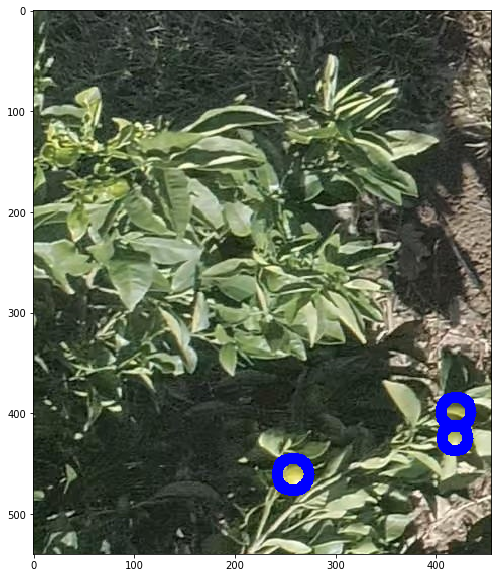

In [30]:
file = random.choice(list(meta_rr["filename"].unique()))
example = (meta_rr.loc[meta_rr["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

## ACFR APPLES - LOOP ALL THROUGH IMAGES

In [31]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/\
Mask RCNN/Annotation projects/ACFR/apples")
#check below code to change from train and test set and vice versa

metadf = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = os.path.join(os.getcwd(),"{}_csv".format(set_))
apples_images = os.path.join(os.getcwd(),"{}_images".format(set_))
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf = pd.concat([metadf, df], ignore_index=True)

/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [32]:
metadf=metadf.drop(['#item', 'c-x','c-y','radius','label'], axis = 1) 
#rearrange columns
metadf = metadf[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]
metadf

filename  file_size file_attributes  \
0     20130320T005809.533784.Cam6_12.png    75957.0              {}   
1     20130320T005809.533784.Cam6_12.png    75957.0              {}   
2     20130320T005809.533784.Cam6_12.png    75957.0              {}   
3     20130320T005809.533784.Cam6_12.png    75957.0              {}   
4     20130320T005809.533784.Cam6_12.png    75957.0              {}   
5     20130320T005809.533784.Cam6_12.png    75957.0              {}   
6     20130320T005732.199644.Cam6_21.png    66960.0              {}   
7     20130320T005732.199644.Cam6_21.png    66960.0              {}   
8     20130320T005732.199644.Cam6_21.png    66960.0              {}   
9     20130320T005732.199644.Cam6_21.png    66960.0              {}   
10    20130320T005732.199644.Cam6_21.png    66960.0              {}   
11    20130320T005732.199644.Cam6_21.png    66960.0              {}   
12    20130320T005732.199644.Cam6_21.png    66960.0              {}   
13    20130320T005732.199644.Cam6_21.png    66960.0              {}   
14    20130320T005732.199644.Cam6_21.png    66960.0              {}   
15    20130320T005732.199644.Cam6_21.png    66960.0              {}   
16    20130320T005732.199644.Cam6_21.png    66960.0              {}   
17    20130320T004756.568760.Cam6_41.png   120320.0              {}   
18    20130320T004756.568760.Cam6_41.png   120320.0              {}   
19    20130320T004756.568760.Cam6_41.png   120320.0              {}   
20    20130320T004756.568760.Cam6_41.png   120320.0              {}   
21    20130320T004756.568760.Cam6_41.png   120320.0              {}   
22    20130320T004756.568760.Cam6_41.png   120320.0              {}   
23    20130320T004756.568760.Cam6_41.png   120320.0              {}   
24    20130320T005320.384934.Cam6_24.png    93808.0              {}   
25    20130320T005320.384934.Cam6_24.png    93808.0              {}   
26    20130320T005320.384934.Cam6_24.png    93808.0              {}   
27    20130320T005320.384934.Cam6_24.png    93808.0              {}   
28    20130320T005320.384934.Cam6_24.png    93808.0              {}   
29         20130320T013611.866233_34.png   100536.0              {}   
...                                  ...        ...             ...   
1058       20130320T012923.476901_31.png    92693.0              {}   
1059       20130320T012923.476901_31.png    92693.0              {}   
1060       20130320T012923.476901_31.png    92693.0              {}   
1061  20130320T004530.279967.Cam6_23.png    72067.0              {}   
1062  20130320T004530.279967.Cam6_23.png    72067.0              {}   
1063  20130320T004530.279967.Cam6_23.png    72067.0              {}   
1064  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1065  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1066  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1067  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1068  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1069  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1070  20130320T004859.236691.Cam6_43.png   110317.0              {}   
1071  20130320T004420.945168.Cam6_44.png   129821.0              {}   
1072  20130320T004420.945168.Cam6_44.png   129821.0              {}   
1073  20130320T004420.945168.Cam6_44.png   129821.0              {}   
1074  20130320T004534.280053.Cam6_73.png   105723.0              {}   
1075  20130320T005801.343117.Cam6_12.png    77818.0              {}   
1076  20130320T005801.343117.Cam6_12.png    77818.0              {}   
1077  20130320T005801.343117.Cam6_12.png    77818.0              {}   
1078       20130320T013550.722937_33.png   104791.0              {}   
1079       20130320T013550.722937_33.png   104791.0              {}   
1080  20130320T005329.337492.Cam6_63.png   114437.0              {}   
1081  20130320T005329.337492.Cam6_63.png   114437.0              {}   
1082  20130320T005329.337492.Cam6_63.png   114437.0     

## TEST`

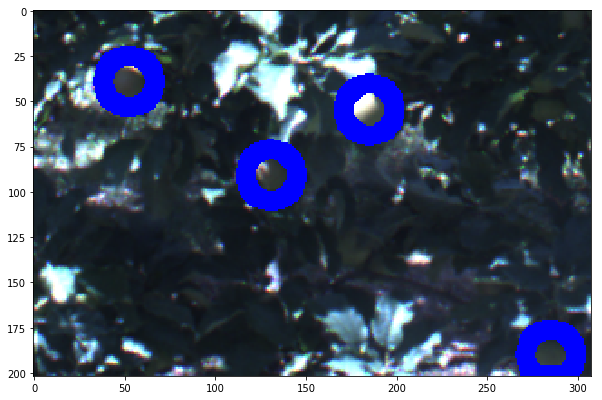

In [33]:
file = random.choice(list(metadf["filename"].unique()))
example = (metadf.loc[metadf["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(os.path.join(os.getcwd(),"{}_images".format(set_),example.loc[1]["filename"]))
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

In [34]:
# OK OK OK OK OK

## ACFR MANGOES

In [35]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/\
Masters by Research/Mask RCNN/Annotation projects/ACFR/mangoes")

In [36]:
def center_radius(x,y,dx,dy):
    cx = x+(0.5*dx)
    cy = y+(0.5*dy)
    radius = 0.5*(max(dx,dy))
    return cx,cy, radius

In [37]:
images_path = os.path.join(os.getcwd(),"{}_images".format(set_))
annotations_path = os.path.join(os.getcwd(),"{}_csv".format(set_))

## ONE

In [38]:
annotations_list = os.listdir(annotations_path)
a = annotations_list[0]
a
df_a = pd.read_csv(os.path.join(annotations_path,a))
df_a
image_name =  a.replace(".csv",".png")
img = cv.imread(os.path.join(images_path,image_name))
for row in range(len(df_a)):
    cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
             df_a.at[row,"dx"],df_a.at[row,"dy"])
    df_a.at[row,"cx"] = cx
    df_a.at[row,"cy"] = cy
    df_a.at[row,"radius"] = radius_
    df_a.at[row,"filename"] = image_name
    df_a.at[row,"file_attributes"] = "{}"
    df_a.at[row,"region_count"] = len(df_a)
    df_a.at[row,'region_id'] = row
    df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
    t = {"name":"polygon","all_points_x":None,"all_points_y":None}
    x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df_a.at[row,'region_shape_attributes'] = str(t)
    df_a.at[row,"region_attributes"] = "{}"

In [39]:
df_a["file_size"] = df_a["file_size"].astype("int64")
df_a["region_count"] = df_a["region_count"].astype("int64")
df_a['region_id'] = df_a['region_id'].astype("int64")
df_a

#item           x           y         dx         dy  label          cx  \
0       0   72.631579  155.789474  30.717490  29.640806      1   87.990324   
1       1  154.210526  174.736842  27.645741  26.676725      1  168.033397   
2       2  275.789474   87.368421  27.645741  32.278838      1  289.612344   
3       3  440.000000   17.894737  24.881167  29.050954      1  452.440584   
4       4  458.947368   16.842105  24.881167  29.050954      1  471.387952   
5       5  398.947368  264.210526  30.106212  35.151654      1  414.000474   
6       6  423.684211  245.263158  24.142171  28.188112      1  435.755296   
7       7  318.947368  405.789474  23.900750  30.696854      1  330.897743   
8       8  135.789474  371.052632  26.290825  30.696854      1  148.934886   
9       9  103.684211  227.368421  21.295568  24.864451      1  114.331995   
10     10   73.157895  118.947368  23.425125  27.350897      1   84.870457   

            cy     radius                               filename  \
0   170.609877  15.358745  20151124T025049.132800_i1923j1012.png   
1   188.075205  13.822871  20151124T025049.132800_i1923j1012.png   
2   103.507840  16.139419  20151124T025049.132800_i1923j1012.png   
3    32.420214  14.525477  20151124T025049.132800_i1923j1012.png   
4    31.367582  14.525477  20151124T025049.132800_i1923j1012.png   
5   281.786354  17.575827  20151124T025049.132800_i1923j1012.png   
6   259.357214  14.094056  20151124T025049.132800_i1923j1012.png   
7   421.137900  15.348427  20151124T025049.132800_i1923j1012.png   
8   386.401058  15.348427  20151124T025049.132800_i1923j1012.png   
9   239.800647  12.432226  20151124T025049.132800_i1923j1012.png   
10  132.622817  13.675448  20151124T025049.132800_i1923j1012.png   

   file_attributes  region_count  region_id  file_size  \
0               {}            11          0    1056928   
1               {}            11          1    1056928   
2               {}            11          2    1056928   
3               {}            11          3    1056928   
4               {}            11          4    1056928   
5               {}            11          5    1056928   
6               {}            11          6    1056928   
7               {}            11          7    1056928   
8               {}            11          8    1056928   
9               {}            11          9    1056928   
10              {}            11         10    1056928   

                              region_shape_attributes region_attributes  
0   {'name': 'polygon', 'all_points_x': [103, 103,...                {}  
1   {'name': 'polygon', 'all_points_x': [181, 181,...                {}  
2   {'name': 'polygon', 'all_points_x': [305, 305,...                {}  
3   {'name': 'polygon', 'all_points_x': [466, 466,...                {}  
4   {'name': 'polygon', 'all_points_x': [485, 485,...                {}  
5   {'name': 'polygon', 'all_points_x': [431, 431,...                {}  
6   {'name': 'polygon', 'all_points_x': [449, 449,...                {}  
7   {'name': 'polygon', 'all_points_x': [346, 346,...                {}  
8   {'name': 'polygon', 'all_points_x': [164, 164,...                {}  
9   {'name': 'polygon', 'all_points_x': [126, 126,...                {}  
10  {'name': 'polygon', 'all_points_x': [98, 98, 9...                {}

## LOOP THROUGH ALL 

In [40]:
annotations_list = os.listdir(annotations_path)
metadf_ = pd.DataFrame(columns=['#item',
 'x',
 'y',
 'dx',
 'dy',
 'label',
 'cx',
 'cy',
 'radius',
 'filename',
 'file_attributes',
 'region_count',
 'region_id',
 'file_size',
 'region_shape_attributes',
 'region_attributes'])
for index,annotation in enumerate(annotations_list):
    df_a = pd.read_csv(os.path.join(annotations_path,annotation))
    df_a
    image_name =  annotation.replace(".csv",".png")
    img = cv.imread(os.path.join(images_path,image_name))
    for row in range(len(df_a)):
        cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
                 df_a.at[row,"dx"],df_a.at[row,"dy"])
        df_a.at[row,"cx"] = cx
        df_a.at[row,"cy"] = cy
        df_a.at[row,"radius"] = radius_
        df_a.at[row,"filename"] = image_name
        df_a.at[row,"file_attributes"] = "{}"
        df_a.at[row,"region_count"] = len(df_a)
        df_a.at[row,'region_id'] = row
        df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df_a.at[row,'region_shape_attributes'] = str(t)
        df_a.at[row,"region_attributes"] = "{}"
    metadf_ = pd.concat([metadf_, df_a], ignore_index=True)


/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [41]:
metadf_["file_size"] = metadf_["file_size"].astype("int64")
metadf_["region_count"] = metadf_["region_count"].astype("int64")
metadf_['region_id'] = metadf_['region_id'].astype("int64")
metadf_

#item          cx          cy         dx         dy file_attributes  \
0        0   87.990324  170.609877  30.717490  29.640806              {}   
1        1  168.033397  188.075205  27.645741  26.676725              {}   
2        2  289.612344  103.507840  27.645741  32.278838              {}   
3        3  452.440584   32.420214  24.881167  29.050954              {}   
4        4  471.387952   31.367582  24.881167  29.050954              {}   
5        5  414.000474  281.786354  30.106212  35.151654              {}   
6        6  435.755296  259.357214  24.142171  28.188112              {}   
7        7  330.897743  421.137900  23.900750  30.696854              {}   
8        8  148.934886  386.401058  26.290825  30.696854              {}   
9        9  114.331995  239.800647  21.295568  24.864451              {}   
10      10   84.870457  132.622817  23.425125  27.350897              {}   
11       0  225.024797  422.344522  22.990771  29.394926              {}   
12       0   28.451043  371.034061  33.744192  41.015490              {}   
13       1   22.087450  323.162250  27.332795  24.219237              {}   
14       2  447.062657  357.203376  33.072682  35.459384              {}   
15       3  412.777444  308.045261  29.765414  28.722101              {}   
16       4  472.777444  231.521838  29.765414  20.938412              {}   
17       5  308.370782  454.575040  24.109985  20.729028              {}   
18       0  245.157077  212.705785  50.314153  45.411571              {}   
19       1   80.304363  391.800348  55.345569  60.442800              {}   
20       2   45.436618  442.374071  40.346920  48.958668              {}   
21       3   78.620413  458.567363  48.819773  59.239989              {}   
22       4  252.830939  424.812468  48.819773  52.782830              {}   
23       5  404.074161  407.962800  43.937795  47.504547              {}   
24       6  357.207993  475.520189  41.784406  44.724588              {}   
25       7  221.659527  486.302112  33.845369  32.604225              {}   
26       8  435.812638  127.941553  27.414749  26.409422              {}   
27       0   46.091805  131.339164  35.341504  34.257275              {}   
28       1  488.751111  274.400512  20.660117  27.748393              {}   
29       2  208.130891  449.777795  29.945992  33.239800              {}   
...    ...         ...         ...        ...        ...             ...   
1800     0  386.903292  131.875943  32.753952  42.699254              {}   
1801     1  370.359868   76.090194  23.877631  31.127756              {}   
1802     2  372.465131   70.827036  23.877631  31.127756              {}   
1803     3  451.553750   44.095450  26.265394  37.664585              {}   
1804     4  456.816908   39.358608  26.265394  37.664585              {}   
1805     5   55.543371  244.366021  38.455164  45.574148              {}   
1806     0  320.714004  215.153494  44.957420  53.836400              {}   
1807     1  246.975215  231.777281  32.773959  31.789856              {}   
1808     2  120.504627  346.775411  32.773959  51.197881              {}   
1809     3  428.025678  340.664971  36.051355  61.329942              {}   
1810     4  109.894916   68.695594  29.201598  36.214717              {}   
1811     5   70.483152   32.225006  29.201598  36.214717              {}   
1812     0  153.874201  165.713451  51.958928  60.900586              {}   
1813     0  245.283784  223.894966  62.567569  66.456599              {}   
1814     1  461.858624  189.801087  41.050582  43.602174              {}   
1815     2  273.883671  218.790296  54.083132  71.264803              {}   
1816     0  438.978093  428.297698  34.146663  39.452539              {}   
1817     1  469.067494  357.883040  27.658797  31.956557              {}   
1818     2   63.398839  429.618546  24.892917  28.760901              {}   
1819     3  105.319727  434.981498  20.163263  23.296330              {}   
1820     0  234.649415   69.238758  35.614620  37.424

In [42]:
metadf_mangoes=metadf_.drop(['#item', 'cx','cy','radius','label','x','y'], axis = 1) 
metadf_mangoes = metadf_mangoes[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]
metadf_mangoes

filename  file_size file_attributes  \
0     20151124T025049.132800_i1923j1012.png    1056928              {}   
1     20151124T025049.132800_i1923j1012.png    1056928              {}   
2     20151124T025049.132800_i1923j1012.png    1056928              {}   
3     20151124T025049.132800_i1923j1012.png    1056928              {}   
4     20151124T025049.132800_i1923j1012.png    1056928              {}   
5     20151124T025049.132800_i1923j1012.png    1056928              {}   
6     20151124T025049.132800_i1923j1012.png    1056928              {}   
7     20151124T025049.132800_i1923j1012.png    1056928              {}   
8     20151124T025049.132800_i1923j1012.png    1056928              {}   
9     20151124T025049.132800_i1923j1012.png    1056928              {}   
10    20151124T025049.132800_i1923j1012.png    1056928              {}   
11    20151124T042953.967490_i1869j1071.png    1062812              {}   
12    20151124T030001.234484_i1735j1192.png    1035204              {}   
13    20151124T030001.234484_i1735j1192.png    1035204              {}   
14    20151124T030001.234484_i1735j1192.png    1035204              {}   
15    20151124T030001.234484_i1735j1192.png    1035204              {}   
16    20151124T030001.234484_i1735j1192.png    1035204              {}   
17    20151124T030001.234484_i1735j1192.png    1035204              {}   
18     20151124T030414.495824_i1968j200.png    1008197              {}   
19     20151124T030414.495824_i1968j200.png    1008197              {}   
20     20151124T030414.495824_i1968j200.png    1008197              {}   
21     20151124T030414.495824_i1968j200.png    1008197              {}   
22     20151124T030414.495824_i1968j200.png    1008197              {}   
23     20151124T030414.495824_i1968j200.png    1008197              {}   
24     20151124T030414.495824_i1968j200.png    1008197              {}   
25     20151124T030414.495824_i1968j200.png    1008197              {}   
26     20151124T030414.495824_i1968j200.png    1008197              {}   
27     20151124T025744.168853_i1947j449.png     997717              {}   
28     20151124T025744.168853_i1947j449.png     997717              {}   
29     20151124T025744.168853_i1947j449.png     997717              {}   
...                                     ...        ...             ...   
1800   20151124T025549.582123_i2325j546.png    1011654              {}   
1801   20151124T025549.582123_i2325j546.png    1011654              {}   
1802   20151124T025549.582123_i2325j546.png    1011654              {}   
1803   20151124T025549.582123_i2325j546.png    1011654              {}   
1804   20151124T025549.582123_i2325j546.png    1011654              {}   
1805   20151124T025549.582123_i2325j546.png    1011654              {}   
1806   20151124T041630.242955_i2427j605.png    1012989              {}   
1807   20151124T041630.242955_i2427j605.png    1012989              {}   
1808   20151124T041630.242955_i2427j605.png    1012989              {}   
1809   20151124T041630.242955_i2427j605.png    1012989              {}   
1810   20151124T041630.242955_i2427j605.png    1012989              {}   
1811   20151124T041630.242955_i2427j605.png    1012989              {}   
1812   20151124T030320.462899_i2317j753.png    1035055              {}   
1813  20151124T024604.399693_i1984j1639.png    1019550              {}   
1814  20151124T024604.399693_i1984j1639.png    1019550              {}   
1815  20151124T024604.399693_i1984j1639.png    1019550              {}   
1816   20151124T043954.775698_i1545j665.png    1075096              {}   
1817   20151124T043954.775698_i1545j665.png    1075096              {}   
1818   20151124T043954.775698_i1545j665.png    1075096              {}   
1819   20151124T043954.775698_i1545j665.png    1075096              {}   
1820  20151124T025858.864128_i2101j1866.png    1017724              {}   
1821  20151124T025858.864128_i2101j1866.png    1017724              {}   
1822  20151124T025858.864128_i2101j1866

## TEST

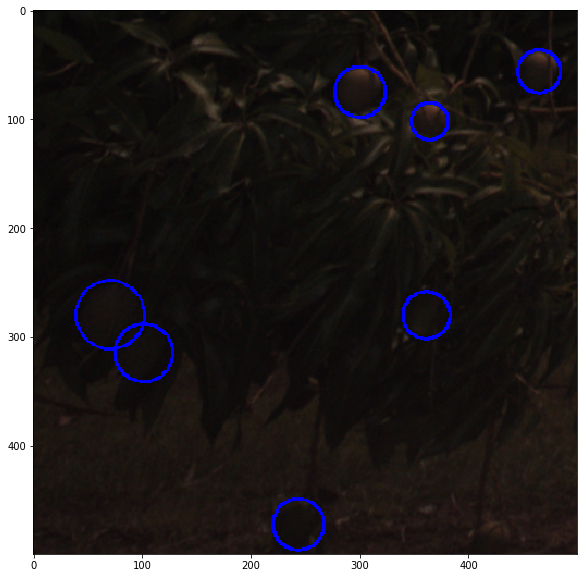

In [43]:
file = random.choice(list(metadf_mangoes["filename"].unique()))
example = (metadf_mangoes.loc[metadf_mangoes["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(os.path.join(os.getcwd(),"{}_images".format(set_),example.loc[1]["filename"]))
try:
    for i in range(len(example)):
        a = ast.literal_eval(example.loc[i]["region_shape_attributes"])
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=2)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
except:
    print("No instance to display")

In [44]:
#OK OK OK OK

## RRR

In [45]:
#json into csv so that we can merge all sets

train = "/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research\
/Mask RCNN/Annotation projects/RRR/{}_images".format(set_)
os.chdir(train)

In [46]:
with open("via_project_rrr.json","r") as file:
    data = file.read()

In [47]:
data = json.loads(data)

In [48]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']
meta_rrr = pd.DataFrame(columns=headers)
meta_rrr

Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

## ONE

In [49]:
i = 19
one = list(data.values())[i]
a = one["filename"] #filename
print(a)
b = one["size"] #file_size
c = "{}" #file_attributes
d = len(one["regions"])#region_count
g = "{}" #region_attributes
img = cv.imread(a)
one_df = pd.DataFrame(columns=headers)
for j in range(len(one["regions"])):
    xc = one["regions"][j]["shape_attributes"]["cx"]#xc
    yc = one["regions"][j]["shape_attributes"]["cy"]#yc
    r = one["regions"][j]["shape_attributes"]["r"]#radius
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
    t['all_points_x']  = x
    t['all_points_y'] = y
    e = j #region_id
    f = t #region_shape_attributes
    row = [a,b,c,d,e,f,g]
    one_df.loc[j] = row
meta_rrr = pd.concat([meta_rrr,one_df],ignore_index=True)
meta_rrr

rr-0002-0001-1-187-0187.jpg


filename file_size file_attributes region_count  \
0  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
1  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
2  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
3  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
4  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
5  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
6  rr-0002-0001-1-187-0187.jpg    464892              {}            8   
7  rr-0002-0001-1-187-0187.jpg    464892              {}            8   

  region_id                            region_shape_attributes  \
0         0  {'name': 'polygon', 'all_points_x': [704, 703,...   
1         1  {'name': 'polygon', 'all_points_x': [800, 799,...   
2         2  {'name': 'polygon', 'all_points_x': [802, 801,...   
3         3  {'name': 'polygon', 'all_points_x': [604, 603,...   
4         4  {'name': 'polygon', 'all_points_x': [770, 769,...   
5         5  {'name': 'polygon', 'all_points_x': [810, 809,...   
6         6  {'name': 'polygon', 'all_points_x': [911, 911,...   
7         7  {'name': 'polygon', 'all_points_x': [911, 911,...   

  region_attributes  
0                {}  
1                {}  
2                {}  
3                {}  
4                {}  
5                {}  
6                {}  
7                {}

In [50]:
n = len(list(data.values()))
meta_rrr = pd.DataFrame(columns=headers)
meta_rrr

Empty DataFrame
Columns: [filename, file_size, file_attributes, region_count, region_id, region_shape_attributes, region_attributes]
Index: []

In [51]:
for i in range(n):
    one = list(data.values())[i]
    a = one["filename"] #filename
    b = one["size"] #file_size
    c = "{}" #file_attributes
    d = len(one["regions"])#region_count
    g = "{}" #region_attributes
    img = cv.imread(a)
    one_df = pd.DataFrame(columns=headers)
    for j in range(len(one["regions"])):
        xc = one["regions"][j]["shape_attributes"]["cx"]#xc
        yc = one["regions"][j]["shape_attributes"]["cy"]#yc
        r = one["regions"][j]["shape_attributes"]["r"]#radius
        t = {'name':'polygon','all_points_x':None,'all_points_y':None}
        x,y = xy_values(xc,yc,r,img.shape[1],img.shape[0])
        t['all_points_x']  = x
        t['all_points_y'] = y
        e = j #region_id
        f = t #region_shape_attributes
        row = [a,b,c,d,e,f,g]
        one_df.loc[j] = row
    meta_rrr = pd.concat([meta_rrr,one_df],ignore_index=True)

In [52]:
meta_rrr

filename file_size file_attributes region_count  \
0    rr-0001-0001-12013-252-304.jpg     74553              {}            1   
1    rr-0001-0001-12014-253-337.jpg     82272              {}            2   
2    rr-0001-0001-12014-253-337.jpg     82272              {}            2   
3     rr-0001-0001-12402-532-81.jpg    122638              {}            3   
4     rr-0001-0001-12402-532-81.jpg    122638              {}            3   
5     rr-0001-0001-12402-532-81.jpg    122638              {}            3   
6     rr-0001-0001-12403-536-88.jpg     98392              {}            6   
7     rr-0001-0001-12403-536-88.jpg     98392              {}            6   
8     rr-0001-0001-12403-536-88.jpg     98392              {}            6   
9     rr-0001-0001-12403-536-88.jpg     98392              {}            6   
10    rr-0001-0001-12403-536-88.jpg     98392              {}            6   
11    rr-0001-0001-12403-536-88.jpg     98392              {}            6   
12       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
13       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
14       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
15       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
16       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
17       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
18       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
19       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
20       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
21       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
22       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
23       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
24       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
25       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
26       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
27       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
28       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
29       rr-0001-0002-1-62-0062.jpg    378044              {}           20   
..                              ...       ...             ...          ...   
563     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
564     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
565     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
566     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
567     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
568     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
569     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
570     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
571     rr-0004-0005-1-128-0128.jpg    297567              {}           10   
572     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
573     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
574     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
575     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
576     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
577     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
578     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
579     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
580     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
581     rr-0004-0005-1-187-0187.jpg    490433              {}           10   
582   rr-0004-0005-11645-117-69.jpg    137534    

## TEST`

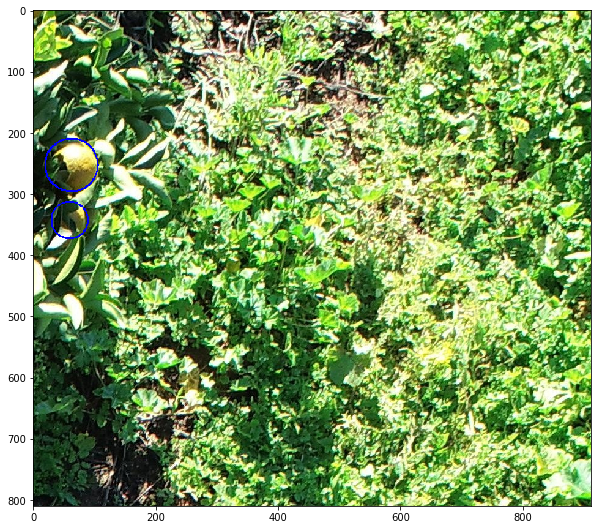

In [54]:
file = random.choice(list(meta_rrr["filename"].unique()))
example = (meta_rrr.loc[meta_rrr["filename"]==file]).reset_index(drop=True)
example
image = cv.imread(example.loc[1]["filename"])
try:
    for i in range(len(example)):
        a = example.loc[i]["region_shape_attributes"]
        x = a["all_points_x"]
        y = a["all_points_y"]
        pts = []
        for j,k in zip(x,y):
            pts.append([j,k])
        pts = np.array(pts)
        img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=2)

    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    
except:
    print("No instance to display")

In [55]:
# OK OK OK OK

## MERGE

In [62]:
#when merging test set remember not to include meta_rr because it doesnt have the test folder
to_path = "/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/\
Masters by Research/Mask RCNN/Annotation projects/fruits/csv"
if set_ == "train":
    merged = pd.concat([meta_fuji,meta_robotics,metadf,metadf_mangoes,meta_rrr,meta_rr],ignore_index=True)
    print("Train Set:",len(merged))
    merged.to_csv(os.path.join(to_path,"train.csv"),index=False)
else:
    merged = pd.concat([meta_fuji,meta_robotics,metadf,metadf_mangoes,meta_rrr],ignore_index=True)
    print("Test Set:",len(merged))
    merged.to_csv(os.path.join(to_path,"test.csv"),index=False)

Test Set: 4569
